# Handling Imbalanced Data: RandomUndersampling & RandomOversampling 
When the dataset has an imbalanced distribution of classes (e.g., 99% of samples belong to class 0 and 1% to class 1), traditional classifiers tend to perform poorly on the minority class. This occurs because the model's loss function is dominated by the majority class, resulting in inaccurate predictions for the minority class. Common problems include:

    Poor Generalization: The model doesn't learn to identify the minority class well.
    Bias: The model might predict the majority class for almost all instances, leading to a high accuracy but poor predictive performance on the minority class.

Approaches to Handle Imbalanced Data

We’ll explore two widely used methods for handling class imbalance:

    Random Oversampling: Increases the number of minority class samples by randomly duplicating them until the classes are balanced.
    Random Undersampling: Reduces the number of majority class samples by randomly removing instances until the classes are balanced.

#### Generating Synthetic Imbalanced Data

Let's generate a synthetic dataset with a highly imbalanced class distribution for the demonstration.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic imbalanced data
np.random.seed(0)
n_samples = 1000
n_classes = 2
n_features = 2
weights = [0.99, 0.01]  # Imbalance ratio

X_majority = np.random.normal(size=(int(n_samples * weights[0]), n_features))
X_minority = np.random.normal(size=(int(n_samples * weights[1]), n_features))
X = np.vstack((X_majority, X_minority))

y_majority = np.zeros(shape=(int(n_samples * weights[0]),), dtype=np.int64)
y_minority = np.ones(shape=(int(n_samples * weights[1]),), dtype=np.int64)
y = np.concatenate((y_majority, y_minority))

df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y
df.sample(5)

,Feature 1,Feature 2,Class
20,-1.048553,-1.420018,0
0,1.764052,0.400157,0
962,-0.495795,1.216578,0
343,2.116791,-1.610878,0
936,-0.730874,-1.641703,0


#### Visualizing the Imbalanced Data

Before applying any resampling techniques, let's take a look at the distribution of the original dataset.

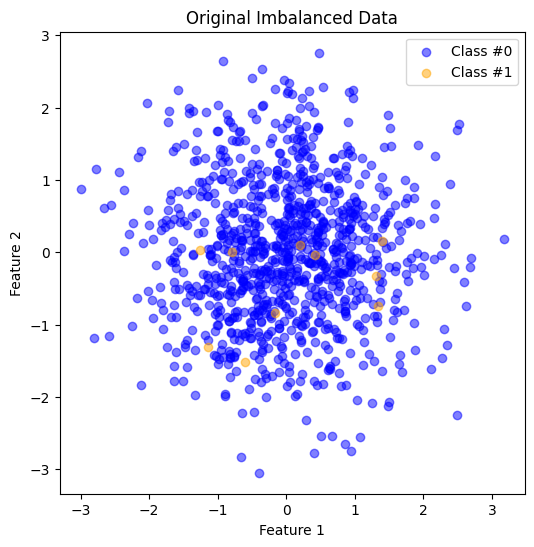

In [2]:
# Plot the original imbalanced dataset
plt.figure(figsize=(6, 6))
plt.scatter(df[df['Class'] == 0]['Feature 1'], df[df['Class'] == 0]['Feature 2'], label="Class #0", alpha=0.5, color='blue')
plt.scatter(df[df['Class'] == 1]['Feature 1'], df[df['Class'] == 1]['Feature 2'], label="Class #1", alpha=0.5, color='orange')
plt.title('Original Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Random Oversampling

In random oversampling, we duplicate instances of the minority class to balance the dataset. However, this can lead to overfitting because the model sees the same data multiple times.



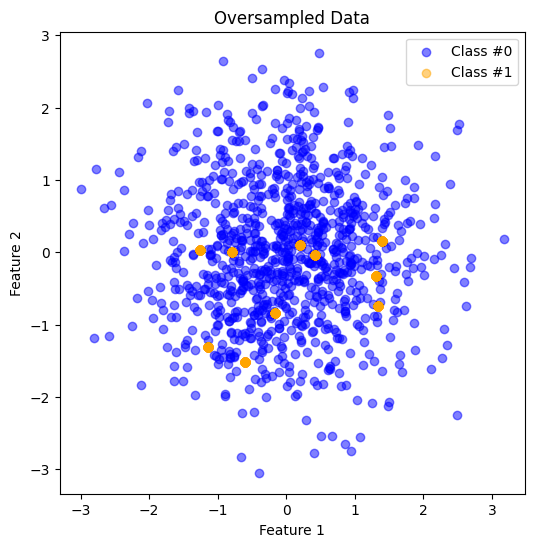

In [3]:
from sklearn.utils import resample

# Perform oversampling on the minority class
minority_class = df[df['Class'] == 1]
oversampled_minority_class = resample(minority_class, replace=True, 
                                      n_samples=len(df[df['Class'] == 0]), 
                                      random_state=0)
df_oversampled = pd.concat([df[df['Class'] == 0], oversampled_minority_class])

# Plot the oversampled data
plt.figure(figsize=(6, 6))
plt.scatter(df_oversampled[df_oversampled['Class'] == 0]['Feature 1'], df_oversampled[df_oversampled['Class'] == 0]['Feature 2'], label="Class #0", alpha=0.5, color='blue')
plt.scatter(df_oversampled[df_oversampled['Class'] == 1]['Feature 1'], df_oversampled[df_oversampled['Class'] == 1]['Feature 2'], label="Class #1", alpha=0.5, color='orange')
plt.title('Oversampled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### Random Undersampling

In random undersampling, we randomly remove instances of the majority class to balance the dataset. While this can help with class balance, it may lead to the loss of potentially important information from the majority class.

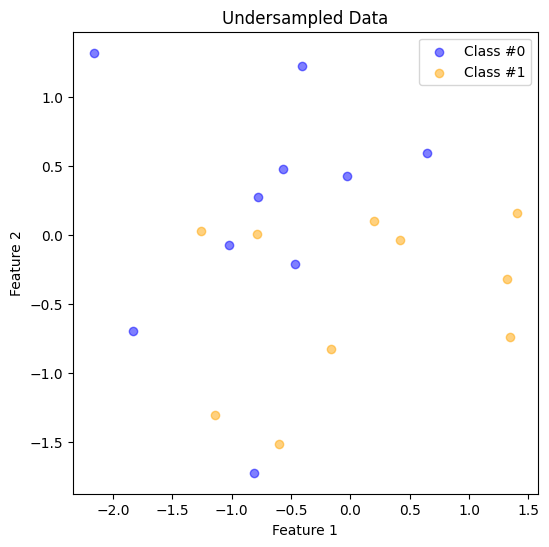

In [4]:
# Perform undersampling on the majority class
majority_class = df[df['Class'] == 0]
undersampled_majority_class = resample(majority_class, replace=False, 
                                       n_samples=len(df[df['Class'] == 1]), 
                                       random_state=0)
df_undersampled = pd.concat([undersampled_majority_class, df[df['Class'] == 1]])

# Plot the undersampled data
plt.figure(figsize=(6, 6))
plt.scatter(df_undersampled[df_undersampled['Class'] == 0]['Feature 1'], df_undersampled[df_undersampled['Class'] == 0]['Feature 2'], label="Class #0", alpha=0.5, color='blue')
plt.scatter(df_undersampled[df_undersampled['Class'] == 1]['Feature 1'], df_undersampled[df_undersampled['Class'] == 1]['Feature 2'], label="Class #1", alpha=0.5, color='orange')
plt.title('Undersampled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Performance Evaluation of Imbalanced Data

Before jumping to more advanced methods, it's important to evaluate how different resampling strategies affect the performance of your classifier. Here’s a quick outline of evaluation techniques:

    Accuracy: Not a good metric for imbalanced datasets, as it can be misleading.
    Precision, Recall, and F1-Score: These metrics are more informative when dealing with imbalanced data, especially Recall for the minority class.
    Confusion Matrix: Helps evaluate the true positives, false positives, true negatives, and false negatives.
    ROC Curve and AUC: Useful for evaluating the trade-off between true positive rate (Recall) and false positive rate.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Train/test split (ensure you're using the original, unmodified data for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize classifier
clf = RandomForestClassifier(random_state=0)

# --- Random Undersampling ---
# Perform random undersampling on the majority class
majority_class = df[df['Class'] == 0]
undersampled_majority_class = resample(majority_class, replace=False, 
                                       n_samples=len(df[df['Class'] == 1]), 
                                       random_state=0)
df_undersampled = pd.concat([undersampled_majority_class, df[df['Class'] == 1]])

X_train_us = df_undersampled.drop('Class', axis=1)
y_train_us = df_undersampled['Class']

# Train model on undersampled data
clf.fit(X_train_us, y_train_us)
y_pred_us = clf.predict(X_test)
# Evaluate models
print("Random Undersampling Performance:")
print(classification_report(y_test, y_pred_us))
print(confusion_matrix(y_test, y_pred_us))


Random Undersampling Performance:
              precision    recall  f1-score   support

           0       1.00      0.52      0.69       293
           1       0.05      1.00      0.09         7

    accuracy                           0.53       300
   macro avg       0.52      0.76      0.39       300
weighted avg       0.98      0.53      0.67       300

[[153 140]
 [  0   7]]


/home/yahya-khalaf/Innovayio/Courses/Data Science and Machine Learninng using Python Workshop/env1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [6]:
# --- Random Oversampling ---
# Perform random oversampling on the minority class
minority_class = df[df['Class'] == 1]
oversampled_minority_class = resample(minority_class, replace=True, 
                                      n_samples=len(df[df['Class'] == 0]), 
                                      random_state=0)
df_oversampled = pd.concat([df[df['Class'] == 0], oversampled_minority_class])

X_train_os = df_oversampled.drop('Class', axis=1)
y_train_os = df_oversampled['Class']

# Train model on oversampled data
clf.fit(X_train_os, y_train_os)
y_pred_os = clf.predict(X_test)
print("\nRandom Oversampling Performance:")
print(classification_report(y_test, y_pred_os))
print(confusion_matrix(y_test, y_pred_os))



Random Oversampling Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00         7

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[293   0]
 [  0   7]]


/home/yahya-khalaf/Innovayio/Courses/Data Science and Machine Learninng using Python Workshop/env1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
from imblearn.over_sampling import SMOTE

# --- SMOTE ---
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=0, k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Train model on SMOTE data
clf.fit(X_smote, y_smote)
y_pred_smote = clf.predict(X_test)

print("\nSMOTE Performance:")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))



SMOTE Performance:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       293
           1       0.06      0.29      0.09         7

    accuracy                           0.87       300
   macro avg       0.52      0.58      0.51       300
weighted avg       0.96      0.87      0.91       300

[[259  34]
 [  5   2]]


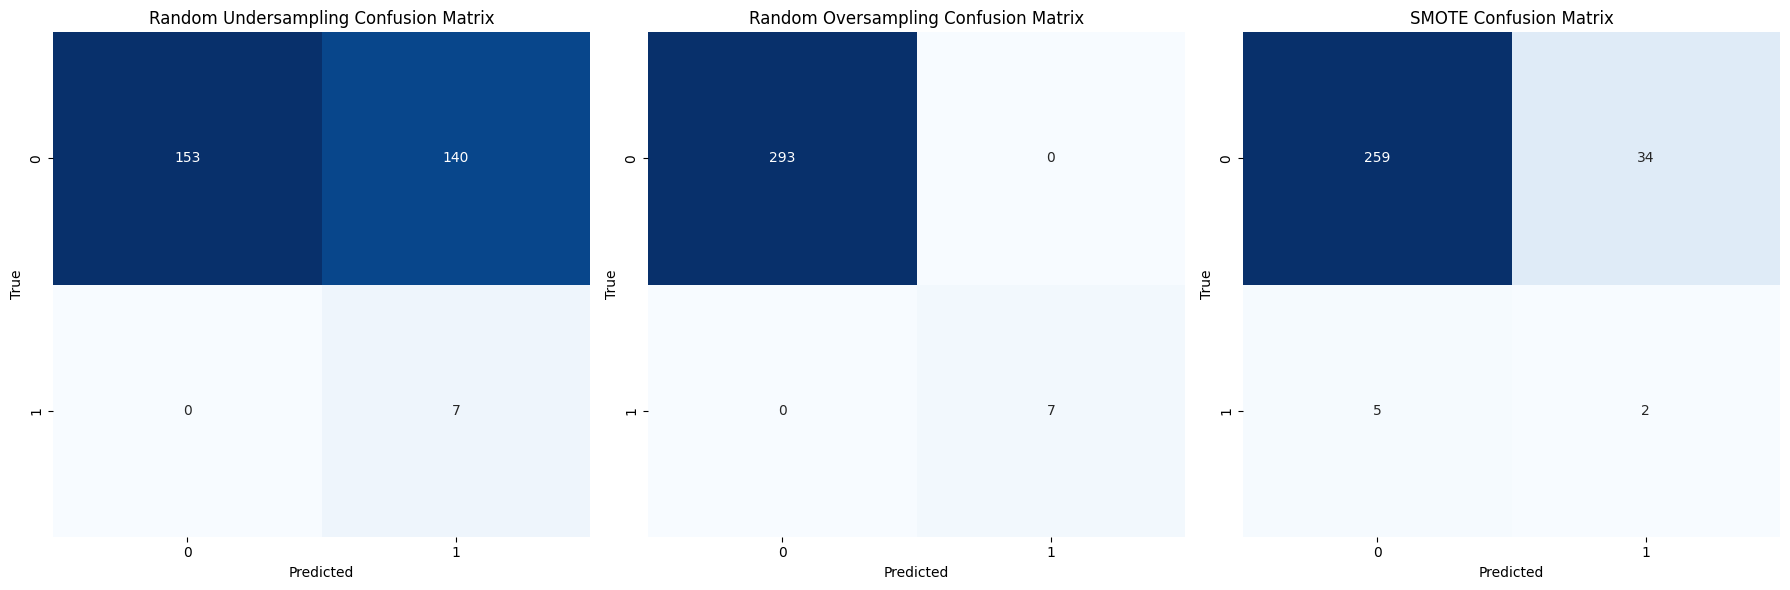

In [8]:
import seaborn as sns
# Visualization of confusion matrices for all methods
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrix for Random Undersampling
cm_us = confusion_matrix(y_test, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title('Random Undersampling Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Confusion matrix for Random Oversampling
cm_os = confusion_matrix(y_test, y_pred_os)
sns.heatmap(cm_os, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title('Random Oversampling Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Confusion matrix for SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_title('SMOTE Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

# Show the plot
plt.tight_layout()
plt.show()
